In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import collections
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('data/open data/train.csv')

In [3]:
train['voted']

0        2
1        2
2        1
3        1
4        1
        ..
45527    2
45528    2
45529    1
45530    1
45531    1
Name: voted, Length: 45532, dtype: int64

In [4]:
train.head()

index  QaA   QaE  QbA   QbE  QcA   QcE  QdA   QdE  QeA  ...  wr_04  wr_05  \
0      0  3.0   363  4.0  1370  5.0   997  1.0  1024  2.0  ...      0      1   
1      1  5.0   647  5.0  1313  3.0  3387  5.0  2969  1.0  ...      1      1   
2      2  4.0  1623  1.0  1480  1.0  1021  4.0  3374  5.0  ...      1      1   
3      3  3.0   504  3.0  2311  4.0   992  3.0  3245  1.0  ...      0      0   
4      4  1.0   927  1.0   707  5.0   556  2.0  1062  1.0  ...      1      1   

   wr_06  wr_07  wr_08  wr_09  wr_10  wr_11  wr_12  wr_13  
0      0      1      1      0      1      0      1      1  
1      0      1      1      0      1      0      1      1  
2      0      1      1      1      1      0      1      1  
3      0      0      1      0      1      0      1      1  
4      1      1      1      0      1      1      1      1  

[5 rows x 78 columns]

In [5]:
train.columns
avgofQ = sum(train['QaA']+train['QaE']+train['QbA']+train['QbE'])/len(train)
avg_resp = (train['QaA']+train['QaE']+train['QbA']+train['QbE'])
train['resp'] = avg_resp*10/avgofQ

In [6]:
races = train['race'].unique()
genders = train['gender'].unique()
religions = train['religion'].unique()
ages = train['age_group'].unique()


In [7]:
train.columns
races = train['race'].unique()
genders = train['gender'].unique()
religions = train['religion'].unique()
ages = sorted(train['age_group'].unique())

race_dict = {}
gender_dict = {}
religion_dict = {}
age_dict = {}

for i,race in enumerate(races):
    race_dict[race]=i
for i,gender in enumerate(genders):
    gender_dict[gender]=i
for i,religion in enumerate(religions):
    religion_dict[religion]=i
for i,age in enumerate(ages):
    age_dict[age]=i

In [8]:
train_set = pd.DataFrame({'age_group':[],'education':[],'engnat':[],
                          'familysize':[],'gender':[],'hand':[],'married':[],'race':[],'religion':[],
                          'urban':[],'resp':[],'voted':[]})

age_col = []
gender_col = []
race_col = []
religion_col = []

for i,row in train.iterrows():
    age_col.append(age_dict[row['age_group']])
    gender_col.append(gender_dict[row['gender']])
    race_col.append(race_dict[row['race']])
    religion_col.append(religion_dict[row['religion']])
    

In [9]:
train_set['age_group'] = age_col
train_set['education'] = train['education']
train_set['engnat'] = train['engnat']
train_set['familysize'] = train['familysize']
train_set['gender'] = gender_col
train_set['hand'] = train['hand']
train_set['married'] = train['married']
train_set['race'] = race_col
train_set['religion'] = religion_col
train_set['urban'] = train['urban']
train_set['voted'] = train['voted']
train_set['resp'] = train['resp']

In [10]:

X = np.array(pd.DataFrame(train_set, columns=['age_group','education','engnat',
                          'familysize','gender','hand','married','race','religion',
                          'urban','resp']))
y = np.array(pd.DataFrame(train_set, columns=['voted']))

In [11]:

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [12]:
test_x = pd.read_csv('data/open data/test_x.csv')
test_set = pd.DataFrame({'age_group':[],'education':[],'engnat':[],
                          'familysize':[],'gender':[],'hand':[],'married':[],'race':[],'religion':[],
                          'urban':[],'resp':[]})

age_col = []
gender_col = []
race_col = []
religion_col = []

avgofQ = sum(test_x['QaA']+test_x['QaE']+test_x['QbA']+test_x['QbE'])/len(test_x)
avg_resp = (test_x['QaA']+test_x['QaE']+test_x['QbA']+test_x['QbE'])
test_x['resp'] = avg_resp*10/avgofQ

for i,row in test_x.iterrows():
    age_col.append(age_dict[row['age_group']])
    gender_col.append(gender_dict[row['gender']])
    race_col.append(race_dict[row['race']])
    religion_col.append(religion_dict[row['religion']])
    
test_set['age_group'] = age_col
test_set['education'] = test_x['education']
test_set['engnat'] = test_x['engnat']
test_set['familysize'] = test_x['familysize']
test_set['gender'] = gender_col
test_set['hand'] = test_x['hand']
test_set['married'] = test_x['married']
test_set['race'] = race_col
test_set['religion'] = religion_col
test_set['urban'] = test_x['urban']
test_set['resp'] = test_x['resp']

In [13]:
test_X = np.array(pd.DataFrame(test_set, columns=['age_group','education','engnat',
                          'familysize','gender','hand','married','race','religion',
                          'urban','resp']))

prediction = dtree.predict(test_X)
collections.Counter(prediction)
result = pd.DataFrame({'voted':prediction})
result['index']=test_x['index']
result = result[['index','voted']]
result.to_csv('data/open data/predict_simpledtree_resp.csv',index=False)

In [14]:
result.head()

index  voted
0      0      1
1      1      2
2      2      1
3      3      2
4      4      2

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0558869 to fit



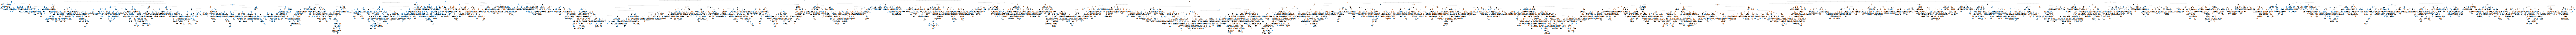

In [15]:
feature_names = train_set.columns.tolist()
feature_names = feature_names[0:11]
target_name = np.array(['Voted No', 'Voted Yes'])
dt_dot_data = tree.export_graphviz(dtree, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())


In [16]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X, y)
prediction = forest.predict(test_X)
collections.Counter(prediction)
result = pd.DataFrame({'voted':prediction})
result['index'] = test_x['index']
result = result[['index','voted']]
result.to_csv('data/open data/predict_RandomForest.csv',index=False)

C:\Users\id272\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [17]:
result.head()

index  voted
0      0      2
1      1      2
2      2      2
3      3      1
4      4      2